# Curva p-y para arcilla blanda drenada con carga estatica

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Construir las curvas p-y para un pilote de 61cm de diametro a las profundidades de 0, 1.5, 3, 5 y 12m

In [2]:
b=0.61 #diametro del pilote (m)
z=np.array([0 ,1.5, 3, 5, 12])

1. Obtener la mayor estimación posible de la variación de la resistencia no drenada cu y peso específico sumergido gamma_sum. Obtener el valor de eps_50, la deformación específica que corresponde a la mitad de la máxima tensión deviatórica.

In [3]:
#Valores obtenidos de tabla
gamma_sum=6.3 #peso especico del suelo sumergido (kN/m3)
eps_50=0.02 #deformacion especifica al 50% de cu
cu=48 #resistencia no drenada ultima (kPa)


2. Calcular la resitencia última por longitud de pilote

pult= [ 87.84   129.6045 171.369  227.055  263.52  ] kN/m


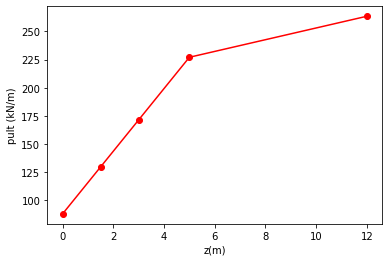

In [4]:
J=0.5 #coeficiente experimental (blandas=0.5, medias=0.25)

#Escribo la funcion que calcula y compara valores
def f_pult(gamma_sum,cu,J,b,z):
    pult1=(3+gamma_sum/cu*z+J/b*z)*cu*b
    pult2=9*cu*b
    
    return np.minimum(pult1,pult2)

#Calculo la resistencia ultima de cada curva
pult=np.empty_like(z)
i=0
for zi in z:
    pult[i]=f_pult(gamma_sum,cu,J,b,zi)
    i=i+1
    
plt.plot(z,pult,'r-o')
plt.xlabel('z(m)')
plt.ylabel('pult (kN/m)')
print('pult=',pult,'kN/m')

3. Calcular la deflexión 𝑦_50 a la mitad de la resistencia utilima del suelo

In [5]:
y_50=2.5*eps_50*b
print('y_50=',y_50,'m')

y_50= 0.0305 m


4. Computar los puntos de la curva p-y

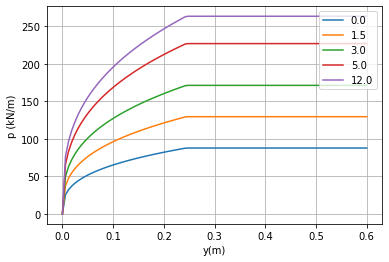

In [14]:
#defino la funcion que crea la curva
def py_curve(pult,y,y_50):
    if y<=8*y_50:
        p=pult*0.5*(y/y_50)**(1/3)
    else:
        p=pult
    
    return p

#defino un rango de deformaciones
y=np.linspace(0,0.6,100)

#creo una matriz en donde almacenar todo
n=y.size
m=z.size
p=np.empty([n, m])

#loop por todos los puntos de z e y para calcular la p correspondiente

for i in range(n):
    for j in range(m):
        p[i,j]=py_curve(pult[j],y[i],y_50)

#ploteo las curvas
for j in range(m):
    plt.plot(y,p[:,j],label=z[j])
    
plt.legend(loc='upper right')
plt.xlabel('y(m)')
plt.ylabel('p (kN/m)')
plt.grid()

# Curva p-y para arcilla blanda drenada con carga ciclica

1. Construir la curva p-y con el procedimiento para carga estatica para  p<=0.75*pult

In [7]:
pult_072=0.72*pult
print('pult_072=',pult_072,'kN/m')

pult_072= [ 63.2448   93.31524 123.38568 163.4796  189.7344 ] kN/m


2. Resolver las ecuaciones de 𝑝𝑢𝑙𝑡, para encontrar el valor de 𝑧 en donde ocurre la transición entre una y otra. Si el peso específico y la resistencia al corte es constante en la zona superior, entonces

In [8]:
zr=6*cu*b/(gamma_sum*b+J*cu)
print('zr=',zr,'m')

zr= 6.309664906798837 m


3. Si la profundidad de la curva p-y es mayor o igual a 𝑧𝑟, entonces 𝑝=0.72𝑝𝑢𝑙𝑡 para 𝑦>3𝑦_50.
4. Si la profundidad de la curva p-y es menor a 𝑧𝑟, entonces 𝑝 decrece linealmente entre 3𝑦_50 e 15𝑦_50. Luego 𝑝 permanece constante para 𝑦≥15𝑦_50.

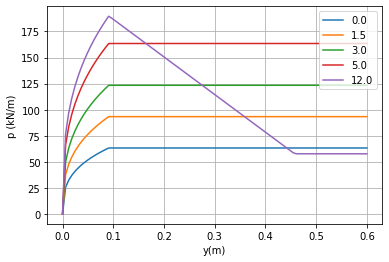

In [12]:
#defino la funcion que crea la curva
def py_curve_circ(pult,y,y_50,z,zr,pult_072):
    if z<=zr:
        if y<=3*y_50:
            p=py_curve(pult,y,y_50)
        else:
            p=pult_072
    else:
        if y<=3*y_50:
            p=py_curve(pult,y,y_50)
        elif y<=15*y_50:
            p=pult_072-pult_072*(z/zr)*(y-3*y_50)
        else:
            p=pult_072-pult_072*(z/zr)*(12*y_50)
    return p

#defino un rango de deformaciones
y=np.linspace(0,0.6,100)

#creo una matriz en donde almacenar todo
n=y.size           
p_cic=np.empty([n, m])
            
#loop por todos los puntos de z e y para calcular la p correspondiente
for i in range(n):
    for j in range(m):
        p_cic[i,j]=py_curve_circ(pult[j],y[i],y_50,z[j],zr,pult_072[j])            
        
#ploteo las curvas
for j in range(m):
    plt.plot(y,p_cic[:,j],label=z[j])
    
plt.legend(loc='upper right')
plt.xlabel('y(m)')
plt.ylabel('p (kN/m)')
plt.grid()